## Plot mean energy spectra and TOL for beluga and narwhal clicks

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Load Data

In [2]:
# import beluga and narwhal sound pressure level (SPL) statistics
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/TOL_ratios/'

# 2013 training dataset
disk_spec_0kHz = pd.read_csv(csv_dir + 'training_data_TOL_ratios.csv')
# Kong Oscar
kong_spec_0kHz  = pd.read_csv(csv_dir + 'testing_kong_data_TOL_ratios_0kHz_highpass.csv')
# Fisher Islands
fish_spec_0kHz  = pd.read_csv(csv_dir + 'testing_fish_data_TOL_ratios_0kHz_highpass.csv')

# join dataframes from both sites
soundtrap_spec_0kHz  = pd.concat([kong_spec_0kHz, fish_spec_0kHz])

In [3]:
## separate beluga and narwhal data
## 2013 data
narwhal_2013_spec_0kHz = disk_spec_0kHz[disk_spec_0kHz.species==85]
beluga_2013_spec_0kHz  = disk_spec_0kHz[disk_spec_0kHz.species==45]

## 0 kHz highpass
narwhal_spec_0kHz = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X085"]
beluga_spec_0kHz  = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X045"]

In [4]:
## select only TOL calculations
narwhal_reson_spec = narwhal_2013_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]
beluga_reson_spec = beluga_2013_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]

narwhal_soundtrap_spec = narwhal_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]
beluga_soundtrap_spec = beluga_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]

### Compute mean and median of TOL ratios

In [7]:
def calculate_mean_median_spl_diff(spec_df):
    # convert to linear scale
    spl_diff = spec_df.iloc[:,3:5] # select columns for sum TOL calcs
    
    # convert to linear scale and calculate mean across all events (rows)
    spl_diff_mean_linear = (10**(spl_diff/20)).mean(axis=0)
    # convert back to dB (log scale)
    spl_diff_mean_dB = 20*np.log10(spl_diff_mean_linear)
    
    print('mean:')
    print(spl_diff_mean_dB,'\n')
    print('median:')
    print(spl_diff.median())

Reson mean and median

In [8]:
calculate_mean_median_spl_diff(narwhal_reson_spec)

mean:
TOL_16to25_sum_dB    133.329302
TOL_25to40_sum_dB     25.115755
dtype: float64 

median:
TOL_16to25_sum_dB    100.39202
TOL_25to40_sum_dB     15.11810
dtype: float64


In [9]:
calculate_mean_median_spl_diff(beluga_reson_spec)

mean:
TOL_16to25_sum_dB     45.224112
TOL_25to40_sum_dB    118.449683
dtype: float64 

median:
TOL_16to25_sum_dB     13.711319
TOL_25to40_sum_dB    100.639541
dtype: float64


SoundTrap mean and median

In [10]:
calculate_mean_median_spl_diff(narwhal_soundtrap_spec)

mean:
TOL_16to25_sum_dB    56.744831
TOL_25to40_sum_dB    -2.279936
dtype: float64 

median:
TOL_16to25_sum_dB    23.632062
TOL_25to40_sum_dB    -9.552733
dtype: float64


In [11]:
calculate_mean_median_spl_diff(beluga_soundtrap_spec)

mean:
TOL_16to25_sum_dB   -13.558675
TOL_25to40_sum_dB    57.188635
dtype: float64 

median:
TOL_16to25_sum_dB   -15.527228
TOL_25to40_sum_dB    34.427812
dtype: float64


Load noise spectra

In [10]:
## load noise spectra
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/noise_spec/'

# 2013 training dataset
reson_noise_spec_df = pd.read_csv(csv_dir + 'reson_avg_noise_spec.csv')
narwhal_reson_noise_spec = reson_noise_spec_df[reson_noise_spec_df.species==85]
beluga_reson_noise_spec  = reson_noise_spec_df[reson_noise_spec_df.species==45]

# Kong Oscar
kong_noise_spec_0kHz  = pd.read_csv(csv_dir + 'kong_avg_noise_spec.csv')
# Fisher Islands
fish_noise_spec_0kHz  = pd.read_csv(csv_dir + 'fish_avg_noise_spec.csv')
# join dataframes from both sites
soundtrap_noise_spec  = pd.concat([kong_noise_spec_0kHz, fish_noise_spec_0kHz])
# separate species
narwhal_ST_noise_spec = soundtrap_noise_spec[soundtrap_noise_spec.species=="X085"]
beluga_ST_noise_spec  = soundtrap_noise_spec[soundtrap_noise_spec.species=="X045"]

In [11]:
# many of the beluga events don't have an accurate noise floor measurement
# need to subset the valid ones
beluga_events_noise = [1713,1714,1716,1758,1789,1967,4841,5007,5031]
beluga_ST_noise_spec_valid = beluga_ST_noise_spec.loc[beluga_ST_noise_spec['eventId'].isin(beluga_events_noise)]

### Prepare TOL dataframes for violin plots

#### mean TOL

In [12]:
## prepare dataframes to plot violin plots

## 2013 dataset
df_narwhal_reson_mean = pd.melt(narwhal_reson_spec, id_vars='eventId',\
                                value_vars=narwhal_reson_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                                var_name='band', value_name='dB')

df_beluga_reson_mean = pd.melt(beluga_reson_spec, id_vars='eventId',\
                               value_vars=beluga_reson_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                               var_name='band', value_name='dB')

## 0 kHz highpass
df_narwhal_ST_mean = pd.melt(narwhal_soundtrap_spec, id_vars='eventId',\
                             value_vars=narwhal_soundtrap_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                             var_name='band', value_name='dB')

df_beluga_ST_mean = pd.melt(beluga_soundtrap_spec, id_vars='eventId',\
                            value_vars=beluga_soundtrap_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                            var_name='band', value_name='dB')

#### sum TOL

In [13]:
## prepare dataframes to plot violin plots

## 2013 dataset
df_narwhal_reson_sum = pd.melt(narwhal_reson_spec, id_vars='eventId',\
                               value_vars=narwhal_reson_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                               var_name='band', value_name='dB')

df_beluga_reson_sum = pd.melt(beluga_reson_spec, id_vars='eventId',\
                              value_vars=beluga_reson_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                              var_name='band', value_name='dB')

## 0 kHz highpass
df_narwhal_ST_sum = pd.melt(narwhal_soundtrap_spec, id_vars='eventId',\
                            value_vars=narwhal_soundtrap_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                            var_name='band', value_name='dB')

df_beluga_ST_sum = pd.melt(beluga_soundtrap_spec, id_vars='eventId',\
                           value_vars=beluga_soundtrap_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                           var_name='band', value_name='dB')

### Calculate average spectra for each group across events

In [14]:
def calculate_avg_spec(spec_df):
    # convert to linear scale and calculate mean across all events (rows)
    avSpec_all_linear = (10**(spec_df/20)).mean(axis=0)
    # convert back to dB (log scale)
    avSpec_all = 20*np.log10(avSpec_all_linear)
    return(avSpec_all)

In [15]:
# PAMpal applies an energy correction to compensate for the Hanning window removing energy. 
# We don't want this correction, so we need to remove it (i.e., correction for the correction)
# We also want to calculate power spectral density (PSD) so need to divide by the FFT window size
N = 512 # FFT window size
fs = 144000 # sampling rate
window = np.hanning(N) # hanning window applied to waveform
correction = 10*np.log10(sum(window)**2/(N*fs))


freq_array_reson = np.arange(0,(250000+250000/256),250000/256)[1:]
freq_array_soundtrap = np.arange(0,(72000+72000/256),(72000/256))[1:]
freq_array_soundtrap_256 = np.arange(0,(72000+72000/128),(72000/128))[1:]

narwhal_reson_avSpec = narwhal_2013_spec_0kHz.loc[:,'X1':'X256'] + 206 + correction # add clipping level and subtract to remove correction
beluga_reson_avSpec = beluga_2013_spec_0kHz.loc[:,'X1':'X256'] + 206 + correction

beluga_ST_avSpec = beluga_spec_0kHz.loc[:,'X1':'X256'] + 173 + correction # add clipping level and remove correction from PAMpal
narwhal_ST_avSpec = narwhal_spec_0kHz.loc[:,'X1':'X256'] + 173 + correction # add clipping level and remove correction from PAMpal

In [16]:
## calculate mean spec across all events
beluga_reson_avSpec_all = calculate_avg_spec(beluga_reson_avSpec)
narwhal_reson_avSpec_all = calculate_avg_spec(narwhal_reson_avSpec)

beluga_ST_avSpec_all = calculate_avg_spec(beluga_ST_avSpec)
narwhal_ST_avSpec_all = calculate_avg_spec(narwhal_ST_avSpec)

In [17]:
# PAMpal applies an energy correction to compensate for the Hanning window removing energy. 
# We don't want this correction, so we need to remove it (i.e., correction for the correction)
# We also want to calculate power spectral density (PSD) so need to divide by the FFT window size
N = 256 # FFT window size for noise spec
fs = 144000 # sampling rate
window = np.hanning(N) # hanning window applied to waveform
correction_256fft = 10*np.log10(sum(window)**2/(N*fs))

beluga_reson_noise_spec_all = calculate_avg_spec(beluga_reson_noise_spec.loc[:,'X1':'X256'] + 206 + correction)
narwhal_reson_noise_spec_all = calculate_avg_spec(narwhal_reson_noise_spec.loc[:,'X1':'X256'] + 206 + correction)

beluga_ST_noise_spec_all = calculate_avg_spec(beluga_ST_noise_spec_valid.loc[:,'X1':'X128'] + 173 + correction_256fft)
narwhal_ST_noise_spec_all = calculate_avg_spec(narwhal_ST_noise_spec.loc[:,'X1':'X128'] + 173 + correction_256fft)

### Plot Reson data

Sum TOL results

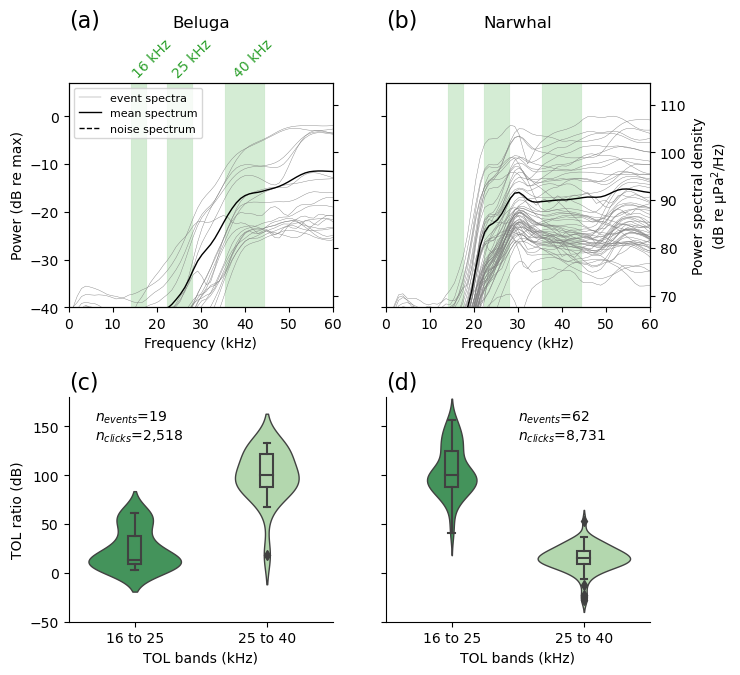

In [18]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species

## identify maximum of rows and columns
beluga_reson_max = (beluga_reson_avSpec.iloc[:,0:72]).max().max()
narwhal_reson_max = (narwhal_reson_avSpec.iloc[:,0:72]).max().max()

## beluga events
for i in range(1,len(beluga_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:]-beluga_reson_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[0,:]-beluga_reson_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_reson/1000,beluga_reson_avSpec_all-beluga_reson_max,'k', linewidth=1,label='mean spectrum')
ax1.yaxis.set_ticks_position('both')

ax1.set_ylabel("Power (dB re max)")

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:]-narwhal_reson_max,'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,narwhal_reson_avSpec_all-narwhal_reson_max,'k', linewidth=1)

## add mean noise spectra to top two plots
ax1.plot(freq_array_reson/1000,beluga_reson_noise_spec_all-beluga_reson_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='upper left',fontsize=8)
ax2.plot(freq_array_reson/1000,narwhal_reson_noise_spec_all-narwhal_reson_max,'k',\
         linewidth=1,linestyle='dashed')

# add second axis with different units, update it whenever ax1 changes
# ax1.yaxis.set_ticks_position('both')
ax1_twin = ax1.twinx()
def convert_ax1_twin(ax1):
    y1, y2 = ax2.get_ylim()
    ax1_twin.set_ylim(y1+beluga_reson_max, y2+beluga_reson_max)
    ax1_twin.figure.canvas.draw()    
ax1.callbacks.connect("ylim_changed", convert_ax1_twin)
ax1_twin.set_yticklabels([])

ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+narwhal_reson_max, y2+narwhal_reson_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")

## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_reson_sum['band'],y=df_beluga_reson_sum['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_reson_sum, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax3)

ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_reson_sum['band'],y=df_narwhal_reson_sum['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_reson_sum, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-40,7)
    ax.set_xlim(0,60)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:green',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("TOL bands (kHz)")
    ax.set_ylim(-50,180)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])
    
for ax in (ax1_twin,ax2_twin):
    ax.set_ylim(-40+narwhal_reson_max,7+narwhal_reson_max)

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax3.text(-0.3,160,'$\it{n}_{events}$=' + str(len(beluga_2013_spec_0kHz['eventId'])),  ha='left', va='center')
ax4.text(0.5,160,'$\it{n}_{events}$=' + str(len(narwhal_2013_spec_0kHz['eventId'])), ha='left', va='center')

ax3.text(-0.3,140,'$\it{n}_{clicks}$=' + f"{beluga_2013_spec_0kHz['n_dets'].sum():,}",  ha='left', va='center')
ax4.text(0.5,140,'$\it{n}_{clicks}$=' + f"{narwhal_2013_spec_0kHz['n_dets'].sum():,}", ha='left', va='center')

# add frequency band numbers
ax1.text(14,7.5,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(23,7.5,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(37,7.5,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:green');

ax2.set_title('Narwhal',pad=40)
ax1.set_title('Beluga',pad=40);

# ## add misclassified events in red
# ax1.plot(freq_array_reson/1000,np.array(misclass_bel)[0],color='r',linewidth=0.5);

# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_1)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_2)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_3)[0],color='r',linewidth=0.5);

plt.savefig('figures/spl_diff_fig_reson.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot SoundTrap data

TOL calculated using sum within frequency bands

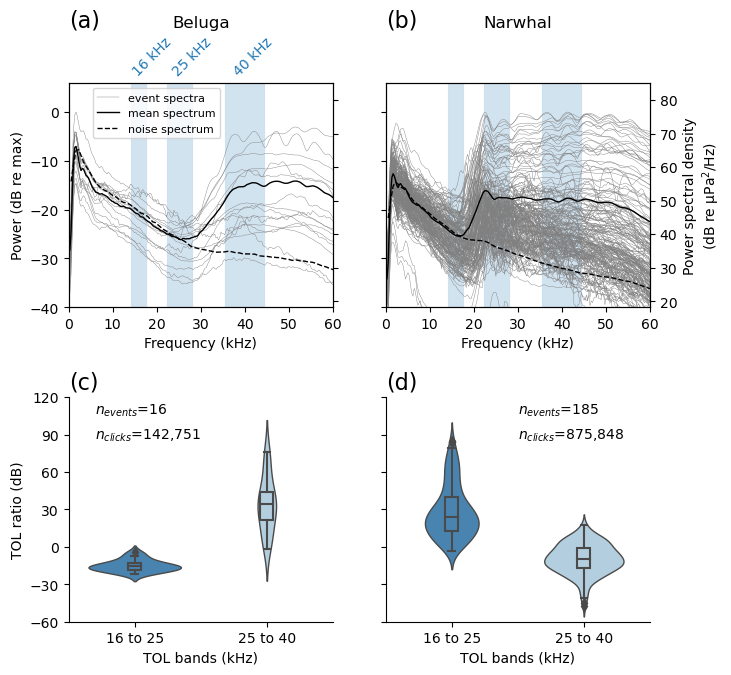

In [19]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species

## identify maximum of rows and columns
beluga_ST_max = beluga_ST_avSpec.max().max()
narwhal_ST_max = narwhal_ST_avSpec.max().max()

## beluga events
for i in range(1,len(beluga_ST_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[i,:]-beluga_ST_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[0,:]-beluga_ST_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_soundtrap/1000,beluga_ST_avSpec_all-beluga_ST_max,'k', linewidth=1,label='mean spectrum')

ax1.set_ylabel("Power (dB re max)")

## narwhal events
for i in range(len(narwhal_ST_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, narwhal_ST_avSpec.iloc[i,:]-narwhal_ST_max,'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,narwhal_ST_avSpec_all-narwhal_ST_max,'k', linewidth=1)

# add mean noise spectra to top two plots
ax2.plot(freq_array_soundtrap_256/1000,narwhal_ST_noise_spec_all-narwhal_ST_max,'k',\
         linewidth=1,linestyle='dashed')
ax1.plot(freq_array_soundtrap_256/1000,beluga_ST_noise_spec_all-beluga_ST_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')

ax1.legend(loc='upper left',fontsize=8, bbox_to_anchor=(0.07, 0.5, 0.5, 0.5)) # (x, y, width, height)

# add second axis with different units, update it whenever ax1 changes
# ax1.yaxis.set_ticks_position('both')
ax1_twin = ax1.twinx()
def convert_ax1_twin(ax1):
    y1, y2 = ax2.get_ylim()
    ax1_twin.set_ylim(y1+beluga_ST_max, y2+beluga_ST_max)
    ax1_twin.figure.canvas.draw()    
ax1.callbacks.connect("ylim_changed", convert_ax1_twin)
ax1_twin.set_yticklabels([])

ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+narwhal_ST_max, y2+narwhal_ST_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_ST_sum['band'],y=df_beluga_ST_sum['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_ST_sum, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency band (kHz)");

sns.violinplot(x=df_narwhal_ST_sum['band'],y=df_narwhal_ST_sum['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.6,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_ST_sum, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-40,6)
    ax.set_xlim(0,60)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:blue',linewidth=0.1);

for ax in (ax1_twin,ax2_twin):
    ax.set_ylim(-60+narwhal_ST_max,7+narwhal_ST_max)
    
for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("TOL bands (kHz)")
    ax.set_ylim(-60,120)
    ax.set_yticks([-60,-30,0,30,60,90,120])

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax3.text(-0.3,110,'$\it{n}_{events}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='left', va='center',size=10)
ax4.text(0.5,110,'$\it{n}_{events}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='left', va='center',size=10)

ax3.text(-0.3,90,'$\it{n}_{clicks}$=' + f"{beluga_spec_0kHz['n_dets'].sum():,}",  ha='left', va='center',size=10)
ax4.text(0.5,90,'$\it{n}_{clicks}$=' + f"{narwhal_spec_0kHz['n_dets'].sum():,}", ha='left', va='center',size=10)


# add frequency band numbers
ax1.text(14,7,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(23,7,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(37,7,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');

ax1.set_title('Beluga',pad=40)
ax2.set_title('Narwhal',pad=40);

## add misclassified events in red
# ax2.plot(freq_array_soundtrap/1000,np.array(misclass_nar_ST)[0],color='r',linewidth=0.5)

plt.savefig('figures/TOL_ratios_sum_soundtrap.png', bbox_inches='tight', dpi=300, facecolor='white')

### Sampling rate figure for presentations

NameError: name 'narwhal_2013_spec_10kHz' is not defined

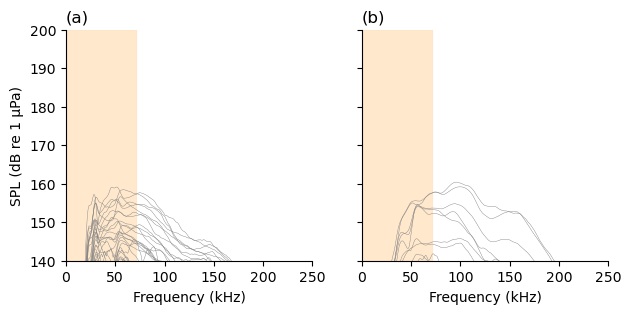

In [38]:
plt.rcParams['figure.figsize'] = (7,3)
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(140,200)
    ax.set_xlim(0,250)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(0, 72, alpha=0.2, color='darkorange',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,40)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(248,198,'$\it{n}$=' + str(len(narwhal_2013_spec_10kHz['eventId'])), ha='right', va='center')
ax2.text(248,198,'$\it{n}$=' + str(len(beluga_2013_spec_10kHz['eventId'])),  ha='right', va='center')

# add frequency band numbers
ax1.text(75,198,'0-72 kHz', ha='left', va='center',color='darkorange');

# plt.savefig('figures/spl_diff_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

### Compute difference between TOL ratios and add to violin plots

In [20]:
## SoundTrap 16 to 25 kHz minus 25 to 40 kHz
narwhal_soundtrap_tol_compare =  narwhal_soundtrap_spec["TOL_25to40_sum_dB"] - narwhal_soundtrap_spec["TOL_16to25_sum_dB"]
beluga_soundtrap_tol_compare =  beluga_soundtrap_spec["TOL_25to40_sum_dB"] - beluga_soundtrap_spec["TOL_16to25_sum_dB"]

narwhal_reson_tol_compare = narwhal_reson_spec["TOL_25to40_sum_dB"] - narwhal_reson_spec["TOL_16to25_sum_dB"]
beluga_reson_tol_compare = beluga_reson_spec["TOL_25to40_sum_dB"] - beluga_reson_spec["TOL_16to25_sum_dB"]

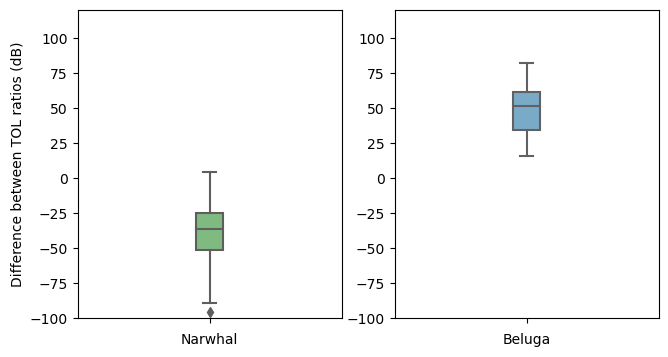

In [21]:
plt.rcParams['figure.figsize'] = (7.5,4)
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(y=narwhal_soundtrap_tol_compare, width=0.1,palette='Greens_r',ax=ax1)
sns.boxplot(y=beluga_soundtrap_tol_compare, width=0.1,palette='Blues_r',ax=ax2)

ax1.set_xlabel("Narwhal")
ax1.set_ylabel("Difference between TOL ratios (dB)")
ax2.set_xlabel("Beluga")

ax1.set_ylim(-100,120)
ax2.set_ylim(-100,120);

### Plot Reson data

In [22]:
beluga_reson_spec_df = beluga_reson_spec.reset_index()
narwhal_reson_spec_df = narwhal_reson_spec.reset_index()

In [23]:
beluga_reson_spec_df['TOL_ratio_diff'] = np.array(beluga_reson_tol_compare)
narwhal_reson_spec_df['TOL_ratio_diff'] = np.array(narwhal_reson_tol_compare)

In [24]:
## prepare dataframes to plot violin plots

## 2013 dataset
narwhal_reson_tol_df = pd.melt(narwhal_reson_spec_df, id_vars='eventId',\
                               value_vars=narwhal_reson_spec_df.loc[:,'TOL_16to25_sum_dB':'TOL_ratio_diff'],\
                               var_name='band', value_name='dB')

beluga_reson_tol_df = pd.melt(beluga_reson_spec_df, id_vars='eventId',\
                              value_vars=beluga_reson_spec_df.loc[:,'TOL_16to25_sum_dB':'TOL_ratio_diff'],\
                              var_name='band', value_name='dB')

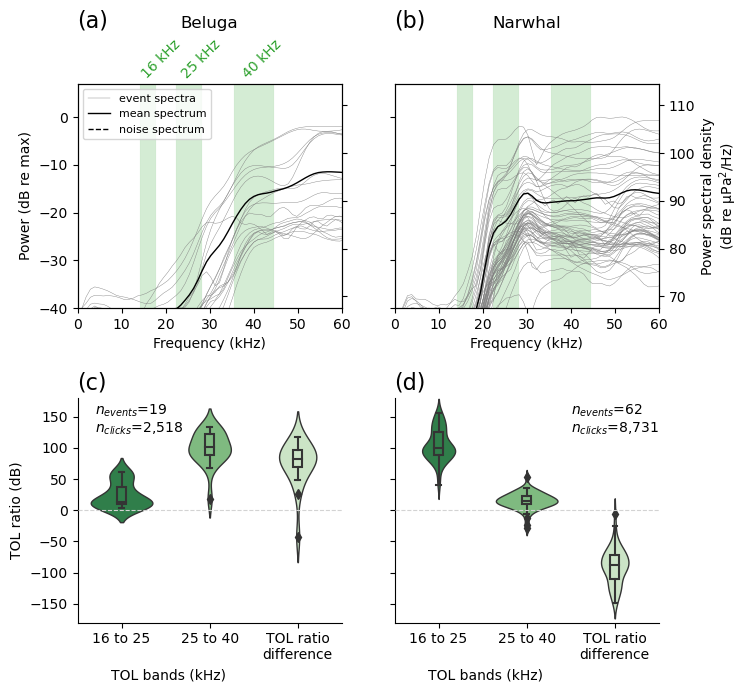

In [30]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species

## identify maximum of rows and columns
beluga_reson_max = (beluga_reson_avSpec.iloc[:,0:72]).max().max()
narwhal_reson_max = (narwhal_reson_avSpec.iloc[:,0:72]).max().max()

## beluga events
for i in range(1,len(beluga_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:]-beluga_reson_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[0,:]-beluga_reson_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_reson/1000,beluga_reson_avSpec_all-beluga_reson_max,'k', linewidth=1,label='mean spectrum')
ax1.yaxis.set_ticks_position('both')

ax1.set_ylabel("Power (dB re max)")

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:]-narwhal_reson_max,'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,narwhal_reson_avSpec_all-narwhal_reson_max,'k', linewidth=1)

## add mean noise spectra to top two plots
ax1.plot(freq_array_reson/1000,beluga_reson_noise_spec_all-beluga_reson_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='upper left',fontsize=8)
ax2.plot(freq_array_reson/1000,narwhal_reson_noise_spec_all-narwhal_reson_max,'k',\
         linewidth=1,linestyle='dashed')

# add second axis with different units, update it whenever ax1 changes
# ax1.yaxis.set_ticks_position('both')
ax1_twin = ax1.twinx()
def convert_ax1_twin(ax1):
    y1, y2 = ax2.get_ylim()
    ax1_twin.set_ylim(y1+beluga_reson_max, y2+beluga_reson_max)
    ax1_twin.figure.canvas.draw()    
ax1.callbacks.connect("ylim_changed", convert_ax1_twin)
ax1_twin.set_yticklabels([])

ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+narwhal_reson_max, y2+narwhal_reson_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")

## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=beluga_reson_tol_df['band'],y=beluga_reson_tol_df['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3,zorder=5);
sns.boxplot(x='band', y='dB', data=beluga_reson_tol_df, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax3,zorder=5)

ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=narwhal_reson_tol_df['band'],y=narwhal_reson_tol_df['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4,zorder=5);
sns.boxplot(x='band', y='dB', data=narwhal_reson_tol_df, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax4,zorder=5)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-40,7)
    ax.set_xlim(0,60)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:green',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40", "TOL ratio\ndifference"])
    ax.set_xlabel("TOL bands (kHz)                   ")
    ax.set_ylim(-180,180)
    ax.axhline(y=0,color='lightgray',linewidth=0.8,linestyle='dashed',zorder=10)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])
    
for ax in (ax1_twin,ax2_twin):
    ax.set_ylim(-40+narwhal_reson_max,7+narwhal_reson_max)

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax3.text(-0.3,160,'$\it{n}_{events}$=' + str(len(beluga_2013_spec_0kHz['eventId'])),  ha='left', va='center')
ax4.text(1.5,160,'$\it{n}_{events}$=' + str(len(narwhal_2013_spec_0kHz['eventId'])), ha='left', va='center')

ax3.text(-0.3,130,'$\it{n}_{clicks}$=' + f"{beluga_2013_spec_0kHz['n_dets'].sum():,}",  ha='left', va='center')
ax4.text(1.5,130,'$\it{n}_{clicks}$=' + f"{narwhal_2013_spec_0kHz['n_dets'].sum():,}", ha='left', va='center')

# add frequency band numbers
ax1.text(14,7.5,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(23,7.5,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(37,7.5,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:green');

ax2.set_title('Narwhal',pad=40)
ax1.set_title('Beluga',pad=40);

# ## add misclassified events in red
# ax1.plot(freq_array_reson/1000,np.array(misclass_bel)[0],color='r',linewidth=0.5);

# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_1)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_2)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_3)[0],color='r',linewidth=0.5);

plt.savefig('figures/tol_fig_reson_v2.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot SoundTrap data

In [31]:
beluga_soundtrap_spec_df = beluga_soundtrap_spec.reset_index()
narwhal_soundtrap_spec_df = narwhal_soundtrap_spec.reset_index()

In [32]:
beluga_soundtrap_spec_df['TOL_ratio_diff'] = np.array(beluga_soundtrap_tol_compare)
narwhal_soundtrap_spec_df['TOL_ratio_diff'] = np.array(narwhal_soundtrap_tol_compare)

In [33]:
## prepare dataframes to plot violin plots

narwhal_ST_tol_df = pd.melt(narwhal_soundtrap_spec_df, id_vars='eventId',\
                            value_vars=narwhal_soundtrap_spec_df.loc[:,'TOL_16to25_sum_dB':'TOL_ratio_diff'],\
                            var_name='band', value_name='dB')

beluga_ST_tol_df = pd.melt(beluga_soundtrap_spec_df, id_vars='eventId',\
                           value_vars=beluga_soundtrap_spec_df.loc[:,'TOL_16to25_sum_dB':'TOL_ratio_diff'],\
                           var_name='band', value_name='dB')

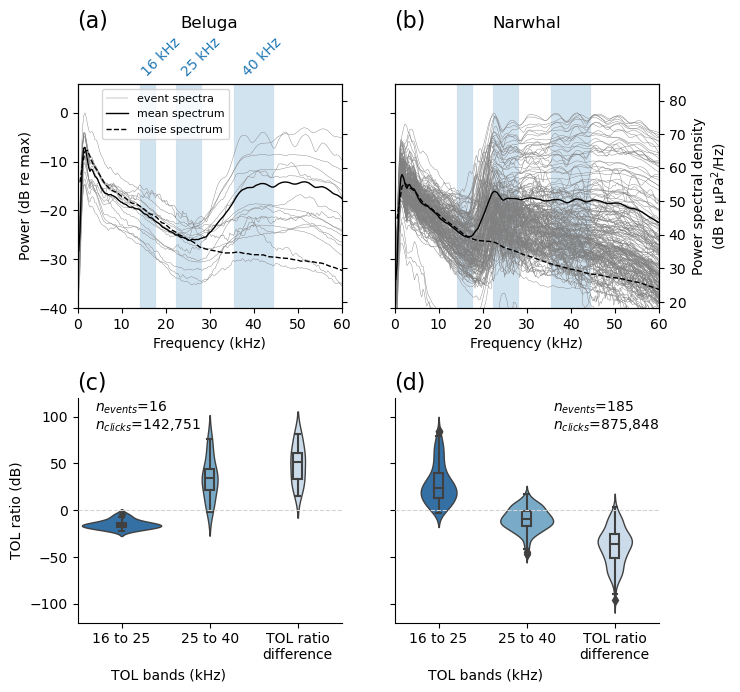

In [34]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species

## identify maximum of rows and columns
beluga_ST_max = beluga_ST_avSpec.max().max()
narwhal_ST_max = narwhal_ST_avSpec.max().max()

## beluga events
for i in range(1,len(beluga_ST_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[i,:]-beluga_ST_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[0,:]-beluga_ST_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_soundtrap/1000,beluga_ST_avSpec_all-beluga_ST_max,'k', linewidth=1,label='mean spectrum')

ax1.set_ylabel("Power (dB re max)")

## narwhal events
for i in range(len(narwhal_ST_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, narwhal_ST_avSpec.iloc[i,:]-narwhal_ST_max,'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,narwhal_ST_avSpec_all-narwhal_ST_max,'k', linewidth=1)

# add mean noise spectra to top two plots
ax2.plot(freq_array_soundtrap_256/1000,narwhal_ST_noise_spec_all-narwhal_ST_max,'k',\
         linewidth=1,linestyle='dashed')
ax1.plot(freq_array_soundtrap_256/1000,beluga_ST_noise_spec_all-beluga_ST_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')

ax1.legend(loc='upper left',fontsize=8, bbox_to_anchor=(0.07, 0.5, 0.5, 0.5)) # (x, y, width, height)

# add second axis with different units, update it whenever ax1 changes
# ax1.yaxis.set_ticks_position('both')
ax1_twin = ax1.twinx()
def convert_ax1_twin(ax1):
    y1, y2 = ax2.get_ylim()
    ax1_twin.set_ylim(y1+beluga_ST_max, y2+beluga_ST_max)
    ax1_twin.figure.canvas.draw()    
ax1.callbacks.connect("ylim_changed", convert_ax1_twin)
ax1_twin.set_yticklabels([])

ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+narwhal_ST_max, y2+narwhal_ST_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=beluga_ST_tol_df['band'],y=beluga_ST_tol_df['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.9,ax=ax3);
sns.boxplot(x='band', y='dB', data=beluga_ST_tol_df, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency band (kHz)");

sns.violinplot(x=narwhal_ST_tol_df['band'],y=narwhal_ST_tol_df['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.6,ax=ax4);
sns.boxplot(x='band', y='dB', data=narwhal_ST_tol_df, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-40,6)
    ax.set_xlim(0,60)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:blue',linewidth=0.1);

for ax in (ax1_twin,ax2_twin):
    ax.set_ylim(-60+narwhal_ST_max,7+narwhal_ST_max)
    
for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40", "TOL ratio\ndifference"])
    ax.set_xlabel("TOL bands (kHz)                   ")
    ax.set_ylim(-120,120)
    # ax.set_yticks([-60,-30,0,30,60,90,120])
    ax.axhline(y=0,color='lightgray',linewidth=0.8,linestyle='dashed',zorder=10)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax3.text(-0.3,110,'$\it{n}_{events}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='left', va='center',size=10)
ax4.text(1.3,110,'$\it{n}_{events}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='left', va='center',size=10)

ax3.text(-0.3,90,'$\it{n}_{clicks}$=' + f"{beluga_spec_0kHz['n_dets'].sum():,}",  ha='left', va='center',size=10)
ax4.text(1.3,90,'$\it{n}_{clicks}$=' + f"{narwhal_spec_0kHz['n_dets'].sum():,}", ha='left', va='center',size=10)


# add frequency band numbers
ax1.text(14,7,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(23,7,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(37,7,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');

ax1.set_title('Beluga',pad=40)
ax2.set_title('Narwhal',pad=40);

## add misclassified events in red
# ax2.plot(freq_array_soundtrap/1000,np.array(misclass_nar_ST)[0],color='r',linewidth=0.5)

plt.savefig('figures/TOL_ratios_sum_soundtrap_v2.png', bbox_inches='tight', dpi=300, facecolor='white')

## Plot example mean spectra

In [72]:
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/ex_spec/'

In [73]:
narwhal_ex_spec = pd.read_csv(csv_dir + 'narwhal_ex_spec.csv')
beluga_ex_spec = pd.read_csv(csv_dir + 'beluga_ex_spec.csv')
narwhal_ex_spec_noise = pd.read_csv(csv_dir + 'narwhal_ex_spec_noise.csv')
beluga_ex_spec_noise = pd.read_csv(csv_dir + 'beluga_ex_spec_noise.csv')

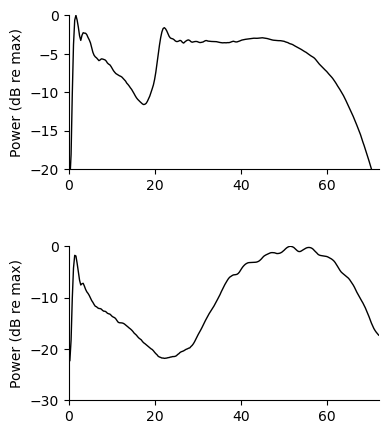

In [74]:
plt.rcParams['figure.figsize'] = (4,5)
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
## narwhal event
ax1.plot(narwhal_ex_spec.freq/1000,(narwhal_ex_spec.avgSpec-narwhal_ex_spec.avgSpec.max()),'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("Power (dB re max)")
ax1.set_xlim(0,72)
ax1.set_ylim(-20,0)
ax1.spines[['right', 'top']].set_visible(False)

ax2.plot(beluga_ex_spec.freq/1000,beluga_ex_spec.avgSpec,'k', linewidth=1,label='mean spectrum')
ax2.set_ylabel("Power (dB re max)")
ax2.set_xlim(0,72)
ax2.set_ylim(-30,0)
ax2.spines[['right', 'top']].set_visible(False)

plt.savefig('figures/whale_ex_spec.png', bbox_inches='tight', dpi=300, facecolor='white')